In [10]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

from regression_tools.plotting_tools import (
    plot_partial_depenence,
    predicteds_vs_actuals)

In [61]:
N = 2000

x1 = np.random.uniform(size=N)
x2 = (
    (x1 < 0.5)*np.random.binomial(n=1, p=0.25, size=N) 
    + (x1 >= 0.5)*np.random.binomial(n=1, p=0.75, size=N))

y = 1 + x1 + 2*x2 + np.random.normal(scale=0.33, size=N)

X = np.empty((N, 2))
X[:, 0] = x1
X[:, 1] = x2

Xdf = pd.DataFrame(X, columns=['x1', 'x2'])

Text(0,0.5,'$y$')

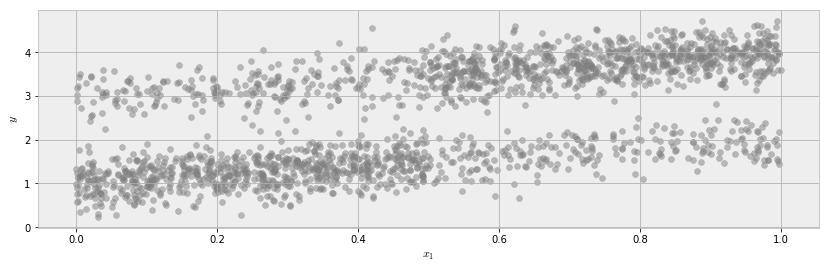

In [62]:
fig, ax = plt.subplots(figsize=(14, 4))

ax.scatter(x1, y, color="grey", alpha=0.5)
ax.set_xlabel('$x_1$')
ax.set_ylabel('$y$')

In [63]:
lm = LinearRegression()
lm.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Text(0,0.5,'Partial Dependence of $\\hat y$ on $x_1$')

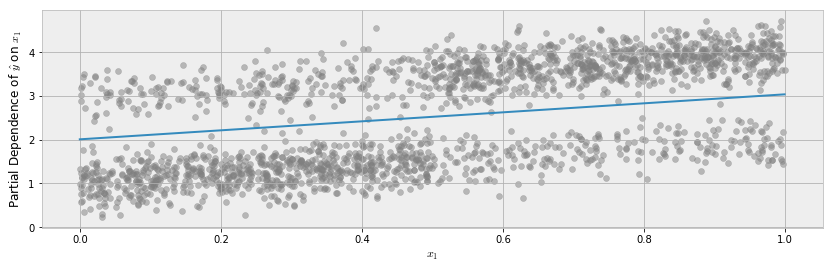

In [64]:
fig, ax = plt.subplots(figsize=(14, 4))
plot_partial_depenence(ax, lm, Xdf, 'x1', y=y)
ax.set_xlabel('$x_1$')
ax.set_ylabel('Partial Dependence of $\hat y$ on $x_1$')

Text(0,0.5,'Mean Predicted Value of $y$')

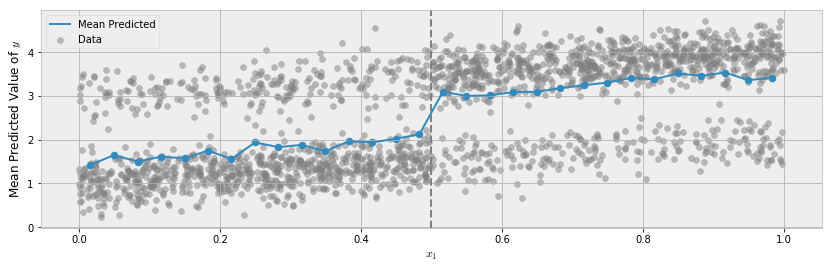

In [65]:
fig, ax = plt.subplots(figsize=(14, 4))
predicteds_vs_actuals(ax, x1, y, lm.predict(X), n_bins=30)
ax.axvline(x=0.5, linestyle='--', color="grey")
ax.set_xlabel('$x_1$')
ax.set_ylabel('Mean Predicted Value of $y$')